# Dimension Reduction 

Unsupervsised machine learning and visualization can help with getting familiar with the data beyond three dimensions. Some data sets like the Digits data set has 64 **features** and a target value. Big data can have hundreds or even thousansds of **features**. We can reduce those **features** or **dimensions** down to two or three. Using graphs on the results can help with choosing the most appropriate machine learning algorithm. For example, if clusters appear in the graph then maybe there are distinct classes in the data, therefore a classificaiton algorithm may be appropriate

In [1]:
from sklearn.datasets import load_digits
#enable Matplotlib in this notebook
%matplotlib inline 

In [2]:
# load data into object digits
digits = load_digits()

### Create a `TSNE` Estimator for Dimensionality Reduction

**TSNE Estimator** : *t-distributed Stochastic Neighbor Embedding*

The __[TSNE estimator](https://scikit-learn.org/stable/modules/manifold.html#t-sne)__ comes from `skleran.manifold` and performs dimension reduction. It is typically used for data sets of high dimensions. It is expensive to run but can be an alternative to PCA if the results of PCA are undesirable. The data will be reduced to two dimensios by using the argument `n_components=2`.

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

### Transforming the Digits Dataset’s Features into Two Dimensions

`Scikit-learn` can reduce dimensions in two steps: 
* Train the estimator with the dataset
* Use the estimator to transform the data into specified number of dimensions

**TNSE** methods can do this in two separate steps using `fit` and `transform`. Both steps will be performed using `fit_transform`

In [4]:
# Check the dimensions before reduction
digits.data.shape

(1797, 64)

In [5]:
reduced_data_2d = tsne.fit_transform(digits.data)

# check the dimensions after reduction
reduced_data_2d.shape

(1797, 2)

### Visualizing the Reduced Data

Using `.scatter` in this case will return a collection of plotted items and will use the reduced data's columns [0] and [1] for the x and y axis

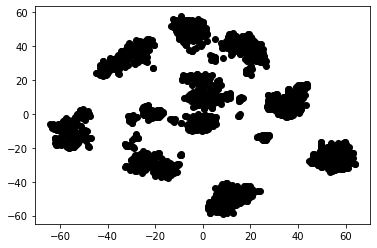

In [6]:
import matplotlib.pyplot as plt

dots = plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1],
                    c='black')                  

There are visible clusters of related data points. There are also loose data that don't seem to be part of specific clusters. 

### Visualizing the Reduced Data with Different Colors for Each Digit

Up to this point there is no evidence the clusters actually representations of the same digit. The targets from the Digits data set will be used to test if the clusters represent the same digits. The `.scatter` argument `c=digits.target` will result in the target values determining the colors for the plot. `cmap=plt.cm.get_cmap('nipy_spectral_r', 10)` will select 10 distinct colors from the color map nipy_spectral_r

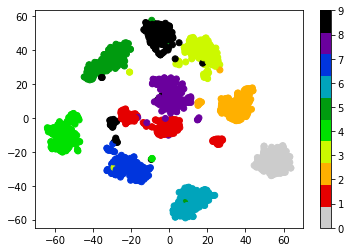

In [7]:
dots = plt.scatter(reduced_data_2d[:, 0], reduced_data_2d[:, 1],
     c=digits.target, cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

colorbar = plt.colorbar(dots)

Based on the results, a supervised learning algorithm like k-nearest neighbors may be useful.

### Visualize using 3D plotting

Recreating a **TSNE** estimator with three dimensions will allow the use of a 3D plot to visualize the results

In [8]:
# create a new estimator in 3 dimensions
tsne = TSNE(n_components=3)
reduced_data_3d = tsne.fit_transform(digits.data)

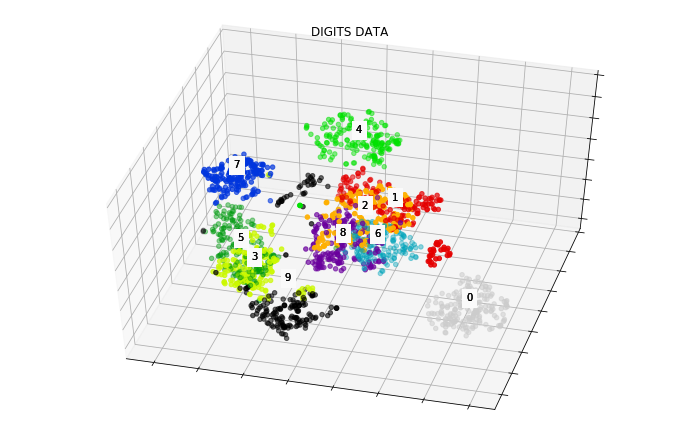

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import warnings
# prevent unnessary jupyter error
warnings.filterwarnings('ignore')

# create X, Y axis data for plot
X = reduced_data_3d
y = digits.target

# create figure with desired size
figure = plt.figure(1,figsize=(10,6))
#create 3D axis object with desired angle 
axes = Axes3D(figure, rect=[0, 0, .95, 1], elev=50, azim=105,)
# create labels for clusters using digit.target
for label in digits.target:
    name = label
    axes.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# plot data in colored clusters similiar to previous plot
dots = axes.scatter(xs=reduced_data_3d[:, 0], ys=reduced_data_3d[:, 1],
                   zs = reduced_data_3d[:, 2], c=digits.target,
                   cmap=plt.cm.get_cmap('nipy_spectral_r',10))
# create title and remove markers along the axis edge
axes.set_title('DIGITS DATA')
axes.w_xaxis.set_ticklabels([])
axes.w_yaxis.set_ticklabels([])
axes.w_zaxis.set_ticklabels([])
figure.show()